In [0]:
# 6 channels 并列 6876 输入，3个label输出（黑白灰）    数据为 54 train， 18 test 

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
strength = 10  # 10为 全部保留   1.。。。。10

# load1 = np.load('/content/drive/My Drive/input/pre/10.npy')
# load2 = np.load('/content/drive/My Drive/output/M2.npy')
# load3 = np.load('/content/drive/My Drive/input/post/10.npy')
# load4 = np.load('/content/drive/My Drive/input/fu/10.npy')
# load5 = np.load('/content/drive/My Drive/output/M3.npy')
# load6 = np.load('/content/drive/My Drive/output/M4.npy')
input1 = np.load('/content/drive/My Drive/input/nor/' + str(strength) + '.npy')
input2 = np.load('/content/drive/My Drive/input/pre/' + str(strength) + '.npy')
input3 = np.load('/content/drive/My Drive/input/post/' + str(strength) + '.npy')
input4 = np.load('/content/drive/My Drive/input/fu/' + str(strength) + '.npy')
output1 = np.load('/content/drive/My Drive/output/M1.npy')
output2 = np.load('/content/drive/My Drive/output/M2.npy')
output3 = np.load('/content/drive/My Drive/output/M3.npy')
output4 = np.load('/content/drive/My Drive/output/M4.npy')

In [0]:
# 1-3 delta   4-7 ceta 8-10 lowalfa 10-12highalfa  13-21beta1 22-30beta2 

In [6]:
output2 = output2.astype(np.float)
output3 = output3.astype(np.float)
output4 = output4.astype(np.float)

(24, 21, 21)


In [0]:
def extract_half_of_matrix1(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(input1[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz 

def extract_half_of_matrix2(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(input2[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz 

def extract_half_of_matrix3(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(input3[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz 
  
def extract_half_of_matrix4(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(input4[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz 

In [77]:
New1 = []
for i in range(24):
    New1.append(extract_half_of_matrix1(i))
Input1 = np.array(New1)

New2 = []
for i in range(24):
    New2.append(extract_half_of_matrix2(i))
Input2 = np.array(New2)

New3 = []
for i in range(24):
    New3.append(extract_half_of_matrix3(i))
Input3 = np.array(New3)

New4 = []
for i in range(24):
    New4.append(extract_half_of_matrix4(i))
Input4 = np.array(New4)

print(Input1.shape)
print(Input2.shape)
print(Input3.shape)
print(Input4.shape)

(24, 30, 6786)
(24, 30, 6786)
(24, 30, 6786)
(24, 30, 6786)


In [0]:
# 1-3 delta   4-7 ceta 8-10 lowalfa 10-12highalfa  13-21beta1 22-30beta2 

In [0]:
def compress_channels1(i):
  New = []
  Delta = (Input1[i,0,:] + Input1[i,1,:] + Input1[i,2,:])/3 
  Ceta = (Input1[i,3,:] + Input1[i,4,:] + Input1[i,5,:] + Input1[i,6,:])/4 
  Lowalfa = (Input1[i,7,:] + Input1[i,8,:] + Input1[i,9,:])/3
  Highalfa = (Input1[i,10,:] + Input1[i,11,:])/2
  Beta1 =(Input1[i,12,:] + Input1[i,13,:] + Input1[i,14,:] + Input1[i,15,:] + Input1[i,16,:] + Input1[i,17,:] + Input1[i,18,:] + Input1[i,19,:] + Input1[i,20,:])/9
  Beta2 =(Input1[i,21,:] + Input1[i,22,:] + Input1[i,23,:] + Input1[i,24,:] + Input1[i,25,:] + Input1[i,26,:] + Input1[i,27,:] + Input1[i,28,:] + Input1[i,29,:])/9
   # New = np.concatenate((Delta,Ceta,Lowalfa,Highalfa,Beta1,Beta2), axis = 0)
  
  New.append(Delta)
  New.append(Ceta)
  New.append(Lowalfa)
  New.append(Highalfa)
  New.append(Beta1)
  New.append(Beta2)
  New = np.array(New)
  # print(New.shape)   30赫兹变成6个频道
  return New

def compress_channels2(i):
  New = []
  Delta = (Input2[i,0,:] + Input2[i,1,:] + Input2[i,2,:])/3 
  Ceta = (Input2[i,3,:] + Input2[i,4,:] + Input2[i,5,:] + Input2[i,6,:])/4 
  Lowalfa = (Input2[i,7,:] + Input2[i,8,:] + Input2[i,9,:])/3
  Highalfa = (Input2[i,10,:] + Input2[i,11,:])/2
  Beta1 =(Input2[i,12,:] + Input2[i,13,:] + Input2[i,14,:] + Input2[i,15,:] + Input2[i,16,:] + Input2[i,17,:] + Input2[i,18,:] + Input2[i,19,:] + Input2[i,20,:])/9
  Beta2 =(Input2[i,21,:] + Input2[i,22,:] + Input2[i,23,:] + Input2[i,24,:] + Input2[i,25,:] + Input2[i,26,:] + Input2[i,27,:] + Input2[i,28,:] + Input2[i,29,:])/9
   # New = np.concatenate((Delta,Ceta,Lowalfa,Highalfa,Beta1,Beta2), axis = 0)
  
  New.append(Delta)
  New.append(Ceta)
  New.append(Lowalfa)
  New.append(Highalfa)
  New.append(Beta1)
  New.append(Beta2)
  New = np.array(New)
  # print(New.shape)   30赫兹变成6个频道
  return New

def compress_channels3(i):
  New = []
  Delta = (Input3[i,0,:] + Input3[i,1,:] + Input3[i,2,:])/3 
  Ceta = (Input3[i,3,:] + Input3[i,4,:] + Input3[i,5,:] + Input3[i,6,:])/4 
  Lowalfa = (Input3[i,7,:] + Input3[i,8,:] + Input3[i,9,:])/3
  Highalfa = (Input3[i,10,:] + Input3[i,11,:])/2
  Beta1 =(Input3[i,12,:] + Input3[i,13,:] + Input3[i,14,:] + Input3[i,15,:] + Input3[i,16,:] + Input3[i,17,:] + Input3[i,18,:] + Input3[i,19,:] + Input3[i,20,:])/9
  Beta2 =(Input3[i,21,:] + Input3[i,22,:] + Input3[i,23,:] + Input3[i,24,:] + Input3[i,25,:] + Input3[i,26,:] + Input3[i,27,:] + Input3[i,28,:] + Input3[i,29,:])/9
   # New = np.concatenate((Delta,Ceta,Lowalfa,Highalfa,Beta1,Beta2), axis = 0)
  
  New.append(Delta)
  New.append(Ceta)
  New.append(Lowalfa)
  New.append(Highalfa)
  New.append(Beta1)
  New.append(Beta2)
  New = np.array(New)
  # print(New.shape)   30赫兹变成6个频道
  return New

def compress_channels4(i):
  New = []
  Delta = (Input4[i,0,:] + Input4[i,1,:] + Input4[i,2,:])/3 
  Ceta = (Input4[i,3,:] + Input4[i,4,:] + Input4[i,5,:] + Input4[i,6,:])/4 
  Lowalfa = (Input4[i,7,:] + Input4[i,8,:] + Input4[i,9,:])/3
  Highalfa = (Input4[i,10,:] + Input4[i,11,:])/2
  Beta1 =(Input4[i,12,:] + Input4[i,13,:] + Input4[i,14,:] + Input4[i,15,:] + Input4[i,16,:] + Input4[i,17,:] + Input4[i,18,:] + Input4[i,19,:] + Input4[i,20,:])/9
  Beta2 =(Input4[i,21,:] + Input4[i,22,:] + Input4[i,23,:] + Input4[i,24,:] + Input4[i,25,:] + Input4[i,26,:] + Input4[i,27,:] + Input4[i,28,:] + Input4[i,29,:])/9
   # New = np.concatenate((Delta,Ceta,Lowalfa,Highalfa,Beta1,Beta2), axis = 0)
  
  New.append(Delta)
  New.append(Ceta)
  New.append(Lowalfa)
  New.append(Highalfa)
  New.append(Beta1)
  New.append(Beta2)
  New = np.array(New)
  # print(New.shape)   30赫兹变成6个频道
  return New





In [0]:
# 把30个赫兹 分成6个频道 
P = []
for i in range(24):
  P.append(compress_channels1(i))
Input1 = np.array(P)

P = []
for i in range(24):
  P.append(compress_channels2(i))
Input2 = np.array(P)

P = []
for i in range(24):
  P.append(compress_channels3(i))
Input3 = np.array(P)

P = []
for i in range(24):
  P.append(compress_channels4(i))
Input4 = np.array(P)


# shape为 (24, 6, 6786)

In [81]:
all_data = np.concatenate((Input1, Input2, Input3, Input4),axis = 0)
print(all_data.shape)

(96, 6, 6786)


In [0]:
# split = 18
# train_data1 = Load1[:split,:,:]   # 18 patients as training
# test_data1 = Load1[split:,:,:]   # 6 as testing
# train_data3 = Load3[:split,:,:]   
# test_data3 = Load3[split:,:,:]
# train_data4 = Load4[:split,:,:]   
# test_data4 = Load4[split:,:,:]
# # train_data = train_data1 +  train_data3 + train_data4
# train_data = np.concatenate((train_data1, train_data3,train_data4), axis=0)  # concatenate all the training instances into one array 
# test_data = np.concatenate((test_data1,test_data3,test_data4), axis= 0)
# print(train_data.shape)
# print(test_data.shape)

(54, 6, 6786)
(18, 6, 6786)


In [90]:
for i in range (24):
    for j in range (21):
        for k in range (21):
            if output1[i,j,k] > 0   and output1[i,j,k] <  32 :
                output1[i,j,k] = 1
            if  output1[i,j,k] ==  32 :
                output1[i,j,k] = 2

for i in range (24):
    for j in range (21):
        for k in range (21):
            if 0 < output2[i,j,k] and output2[i,j,k] < 32:
                output2[i,j,k] = 1
            if  output2[i,j,k] == 32:
                output2[i,j,k] = 2

for i in range (24):
    for j in range (21):
        for k in range (21):
            if  0  < output3[i,j,k] and output3[i,j,k] <  32 :
                output3[i,j,k] = 1
            if  output3[i,j,k] ==  32 :
                output3[i,j,k] = 2

for i in range (24):
    for j in range (21):
        for k in range (21):
            if  0  < output4[i,j,k] and output4[i,j,k] <  32 :
                output4[i,j,k] = 1
            if  output4[i,j,k] ==  32 :
                output4[i,j,k] = 2

all_label = np.concatenate((output1, output2, output3, output4), axis = 0)

print(all_label.shape)

# train_label = load2[:18,:,:]
# test_label= load2[18:,:,:]
# train_label5 = load5[:18,:,:]
# test_label5= load5[18:,:,:]
# train_label6 = load6[:18,:,:]
# test_label6= load6[18:,:,:]
# train_label = np.concatenate((train_label, train_label5,train_label6), axis=0)
# test_label = np.concatenate((test_label,test_label5,test_label6), axis=0)  

# train_label=np.reshape(train_label, (54, 21*21))
# test_label=np.reshape(test_label, (18, 21*21))
# print(train_label.shape)
# print(train_data.shape)

(96, 21, 21)


In [91]:
percent = []
for i in range (96):
  c1 = 0 #blind
  c2 = 0 #partial
  c3 = 0 #normal
  for j in range (21):
    for k in range (21):
      if  all_label[i,j,k] == 0:
        c1+=1
      if 0 < all_label[i,j,k] and all_label[i,j,k] < 32:
        c2+=1
      if  all_label[i,j,k] == 32:
        c3+=1
      
  percent.append([c1/441,c2/441,c3/441])
all_label = np.array(percent)
print(all_label.shape) 

(96, 3)


In [93]:
print(all_data.shape)   #输入为  6 * 6786  ，输出为  3个label （blind，partial，normal）
print(all_label.shape)

(96, 6, 6786)
(96, 3)


In [0]:

# train_label = C2_percent[:split,:]
# test_label= C2_percent[split:,:]
# train_label5 = C5_percent[:split,:]
# test_label5= C5_percent[split:,:]
# train_label6 = C6_percent[:split,:]
# test_label6= C6_percent[split:,:]
# train_label = np.concatenate((train_label, train_label5,train_label6), axis=0)
# test_label = np.concatenate((test_label,test_label5,test_label6), axis=0)  

# # train_label=np.reshape(train_label, (54, 21*21))
# # test_label=np.reshape(test_label, (18, 21*21))
# print(train_label.shape)
# print(train_data.shape)
# print(test_label.shape)
# print(test_data.shape)

In [0]:
train_data1=train_data[:,0,:]
train_data2=train_data[:,1,:]
train_data3=train_data[:,2,:]
train_data4=train_data[:,3,:]
train_data5=train_data[:,4,:]
train_data6=train_data[:,5,:]

test_data1=test_data[0,0,:].reshape(1,6786)
test_data2=test_data[0,1,:].reshape(1,6786)
test_data3=test_data[0,2,:].reshape(1,6786)
test_data4=test_data[0,3,:].reshape(1,6786)
test_data5=test_data[0,4,:].reshape(1,6786)
test_data6=test_data[0,5,:].reshape(1,6786)  

Test_data1=test_data[:,0,:]
Test_data2=test_data[:,1,:]
Test_data3=test_data[:,2,:]
Test_data4=test_data[:,3,:]
Test_data5=test_data[:,4,:]
Test_data6=test_data[:,5,:]


In [0]:
# 第一个unit
IN1 = Input(shape=(6786,))
t1 = Dense(3700,activation = 'relu')(IN1)
t1 = Dense(1800,activation = 'relu')(t1)
t1 = Dense(900,activation = 'relu')(t1)
t1 = Dense(400,activation = 'relu')(t1)

# 第个unit
IN2 = Input(shape=(6786,))
t2 = Dense(3700,activation = 'relu')(IN2)
t2 = Dense(1800,activation = 'relu')(t2)
t2 = Dense(900,activation = 'relu')(t2)
t2 = Dense(400,activation = 'relu')(t2)

# 第个unit
IN3 = Input(shape=(6786,))
t3 = Dense(3700,activation = 'relu')(IN3)
t3 = Dense(1800,activation = 'relu')(t3)
t3 = Dense(900,activation = 'relu')(t3)
t3 = Dense(400,activation = 'relu')(t3)

# 第个unit
IN4 = Input(shape=(6786,))
t4 = Dense(3700,activation = 'relu')(IN4)
t4 = Dense(1800,activation = 'relu')(t4)
t4 = Dense(900,activation = 'relu')(t4)
t4 = Dense(400,activation = 'relu')(t4)

# 第个unit
IN5 = Input(shape=(6786,))
t5 = Dense(3700,activation = 'relu')(IN5)
t5 = Dense(1800,activation = 'relu')(t5)
t5 = Dense(900,activation = 'relu')(t5)
t5 = Dense(400,activation = 'relu')(t5)

# 第个unit
IN6 = Input(shape=(6786,))
t6 = Dense(3700,activation = 'relu')(IN6)
t6 = Dense(1800,activation = 'relu')(t6)
t6 = Dense(900,activation = 'relu')(t6)
t6 = Dense(400,activation = 'relu')(t6)




In [0]:
# merge = concatenate([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30])
merge = concatenate([t1,t2,t3,t4,t5,t6])
# merge =  Flatten()(merge)
M3 = Dense(2700,activation = 'relu')(merge)
M4 = Dense(1350,activation = 'relu')(M3)
M5 = Dense(680,activation = 'relu')(M4)
M6 = Dense(340,activation = 'relu')(M5)
M7 = Dense(170,activation = 'relu')(M6)
M8 = Dense(80,activation = 'relu')(M7)
M9 = Dense(40,activation = 'relu')(M8)
M10 = Dense(20,activation = 'relu')(M9)

M11 = Dense(3,activation = 'softmax')(M10)
# M11 = Dense(3)(M10)

model = Model(inputs=[IN1,IN2,IN3,IN4,IN5,IN6], outputs=M11)
# model = Model(inputs=[IN1,IN2,IN3,IN4,IN5,IN6,IN7,IN8,IN9,IN10,IN11,IN12,IN13,IN14,IN15,IN16,IN17,IN18,IN19,IN20,IN21,IN22,IN23,IN24,IN25,IN26,IN27,IN28,IN29,IN30], outputs=M11)
from keras.optimizers import RMSprop,Adam
model.compile(optimizer = Adam(lr=0.00001),
              loss = 'mean_squared_error',
              metrics = ['mse'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6786)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6786)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 6786)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6786)         0                                            
____________________________________________________________________________________________

In [0]:
# model.fit([train_data1,train_data2,train_data3,train_data4,train_data5,train_data6,train_data7,train_data8,train_data9,train_data10,train_data11,train_data12,train_data13,train_data14,train_data15,train_data16,train_data17,train_data18,train_data19,train_data20,train_data21,train_data22,train_data23,train_data24,train_data25,train_data26,train_data27,train_data28,train_data29,train_data30], train_label, epochs=1000)
history = model.fit([train_data1,train_data2,train_data3,train_data4,train_data5,train_data6], train_label, epochs=100)

Epoch 1/100
54/54 [==============================] - 4s 78ms/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0622 - mean_squared_error: 0.0622
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0611 - mean_squared_error: 0.0611
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0599 - mean_squared_error: 0.0599
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 8/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 9/100
54/54 [==============================] - 0s 3ms/step - loss: 0.0584 - mean_squared_error: 0.0584
Epoch 10/100
54/54

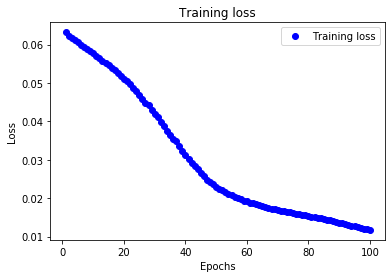

In [0]:
loss = history.history['loss']
# val_loss = history.history['val_loss']
# acc = history.history['acc']
# val_acc=history.history['val_acc']
epochs = range(1,len(loss) +1)
plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [0]:
#  model.predict(x = [test_data1,test_data2,test_data3,test_data4,test_data5,test_data6,test_data7,test_data8,test_data9,test_data10,test_data11,test_data12,test_data13,test_data14,test_data15,test_data16,test_data17,test_data18,test_data19,test_data20,test_data21,test_data22,test_data23,test_data24,test_data25,test_data26,test_data27,test_data28,test_data29,test_data30])
newx = [test_data1,test_data2,test_data3,test_data4,test_data5,test_data6]


model.predict(newx)  #只取一个data做test 


array([[0.28107962, 0.3618354 , 0.357085  ]], dtype=float32)

In [0]:
print(test_label[0])

[0.36734694 0.63265306 0.        ]
